<a href="https://colab.research.google.com/github/Adilbenchadli/Hellow-world/blob/main/Copy_of_PYF_Project_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context MAJ

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/foodhub_order.csv'
df = pd.read_csv(path)
display(df)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [ ]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:

There is 1898 Lignes and 9 columns in the datafram df


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observations:

The datatypes of the columns are:

*   One attributs is float
*   Four attributs are integer
*   Four attributs are objects

We remarque that rating is an object. but it's better that it will be integer




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here

df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


There is no missing values. 1898 lignes are present in the dataframe. Every coumns have 1898 values non-null


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

Efficiency: The service is quite predictable. A customer can expect their food to be ready in about $27$ minutes and delivered in another $24$ minutes.

Affordability: The service caters mostly to the "budget to mid-range" market, with the bulk of orders falling between $\$12.08$ and $\$22.30$.

Operational Bottleneck: On average, food preparation takes longer than the actual delivery. If the company wants to reduce the total wait time, focusing on kitchen efficiency would yield more significant results than optimizing delivery routes.



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df[df['rating'] == "Not given"]



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


#### Observations:

There is 736 orders not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# How many kitchens are there??
df['restaurant_name'].nunique()


178

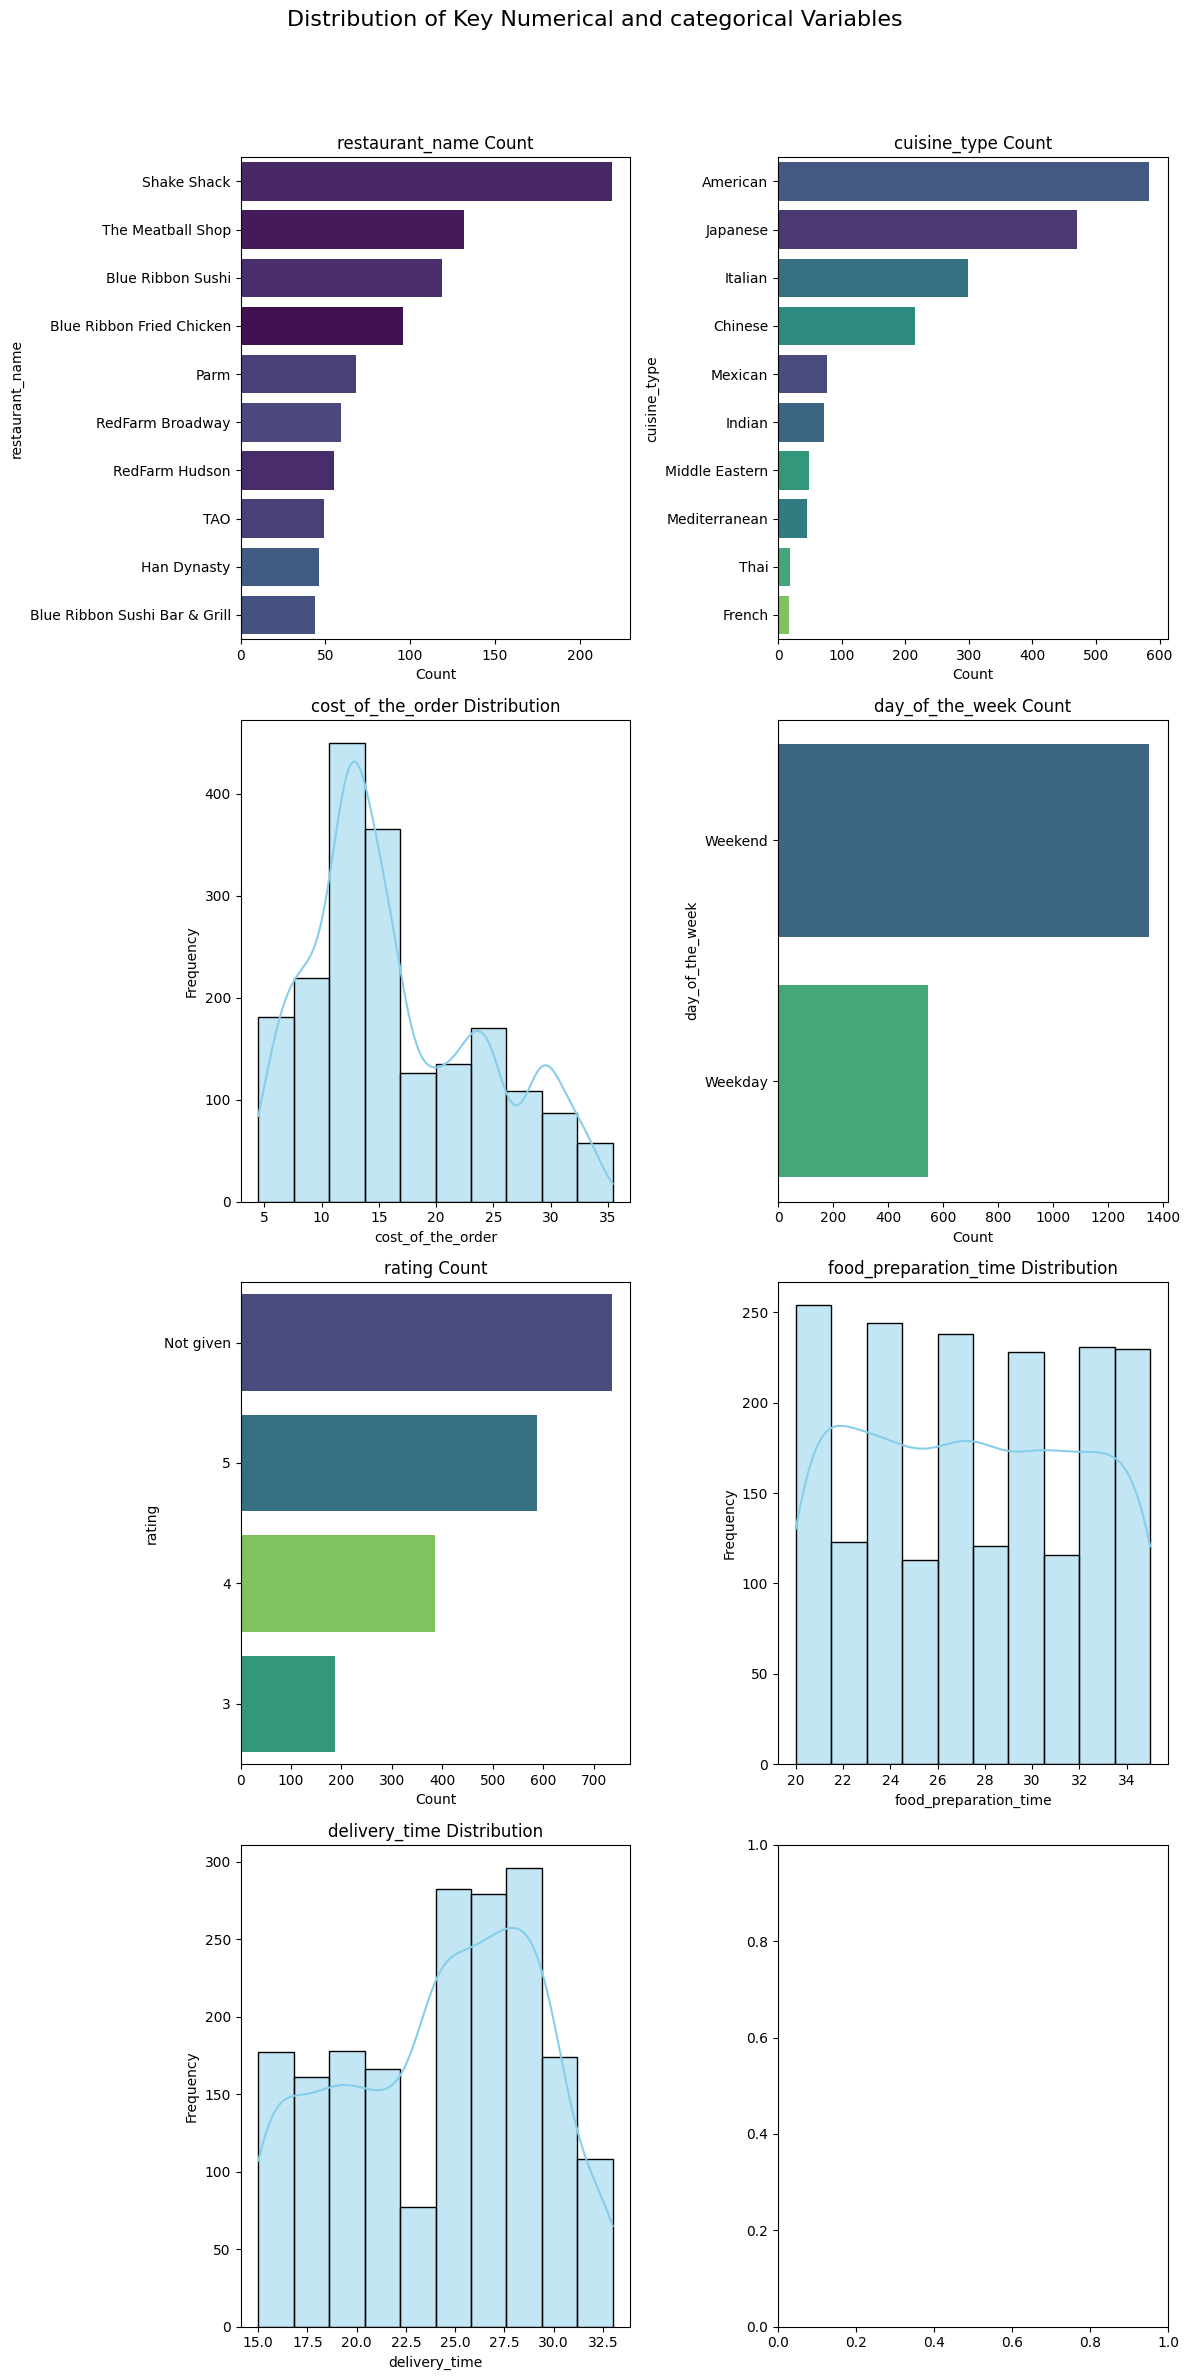

In [ ]:

# We analize the numerical attributes with Histplot graphs. And object attributes with countplot.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 25))
fig.suptitle('Distribution of Key Numerical and categorical Variables', fontsize=16)

# Initialize row and column counters for subplots
row = 0
col = 0

df_modif = df.drop(columns=['order_id','customer_id']) # Corrected: use parentheses for method call and specify 'columns'

# Loop for iterating through DataFrame columns
for column_name in df_modif.columns:
    if row < axes.shape[0] and col < axes.shape[1]:
        if df_modif[column_name].dtype in ['int64', 'float64']:

            sns.histplot(df_modif[column_name], bins=10, kde=True, ax=axes[row, col], color='skyblue')
            axes[row, col].set_title(f'{column_name} Distribution')
            axes[row, col].set_xlabel(column_name)
            axes[row, col].set_ylabel('Frequency')

            col += 1
            if col >= axes.shape[1]:
                col = 0
                row += 1
        elif df_modif[column_name].dtype == 'object':
            if column_name in ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']:
                top_10 = df_modif[column_name].value_counts().iloc[:10].index
                sns.countplot(y=df_modif[column_name], order=top_10, ax=axes[row, col], palette='viridis', hue=df_modif[column_name], legend=False)
                axes[row, col].set_title(f'{column_name} Count')
                axes[row, col].set_xlabel('Count')
                axes[row, col].set_ylabel(column_name)

                col += 1
                if col >= axes.shape[1]:
                    col = 0
                    row += 1

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observations:

1.Preferences and Popularity

Dominant Restaurants: Shake Shack is by far the most popular restaurant in terms of order volume, followed by The Meatball Shop and Blue Ribbon Sushi.

Cuisine Types: American cuisine is the most popular, closely followed by Japanese and Italian. These three categories constitute the bulk of the market, while French and Thai cuisine are very marginal.

2.Temporal Behavior and Rating

Weekend Concentration: There is a massive contrast between weekend and weekday orders. Order volumes explode during the weekend (approximately 1,300 compared to 500-600 on weekdays).

Review Issues: The rating count graph shows that the majority of customers choose not to give a rating ("Not given"). For those who do rate, the scores are predominantly positive (5 being the most frequent).

3.Cost and Logistics Analysis

Order Cost: The distribution is right-skewed. Most orders are between $10 and $15, with a gradual decrease as the price increases.

Preparation Time: Unlike other metrics, preparation time is fairly uniform. It consistently fluctuates between 20 and 35 minutes, suggesting a degree of standardization in the kitchen, regardless of the dish.

Delivery Time: A bimodal distribution (two peaks) is observed. A large number of deliveries take 25-30 minutes, but there is a significant second group with deliveries taking around 15-20 minutes.

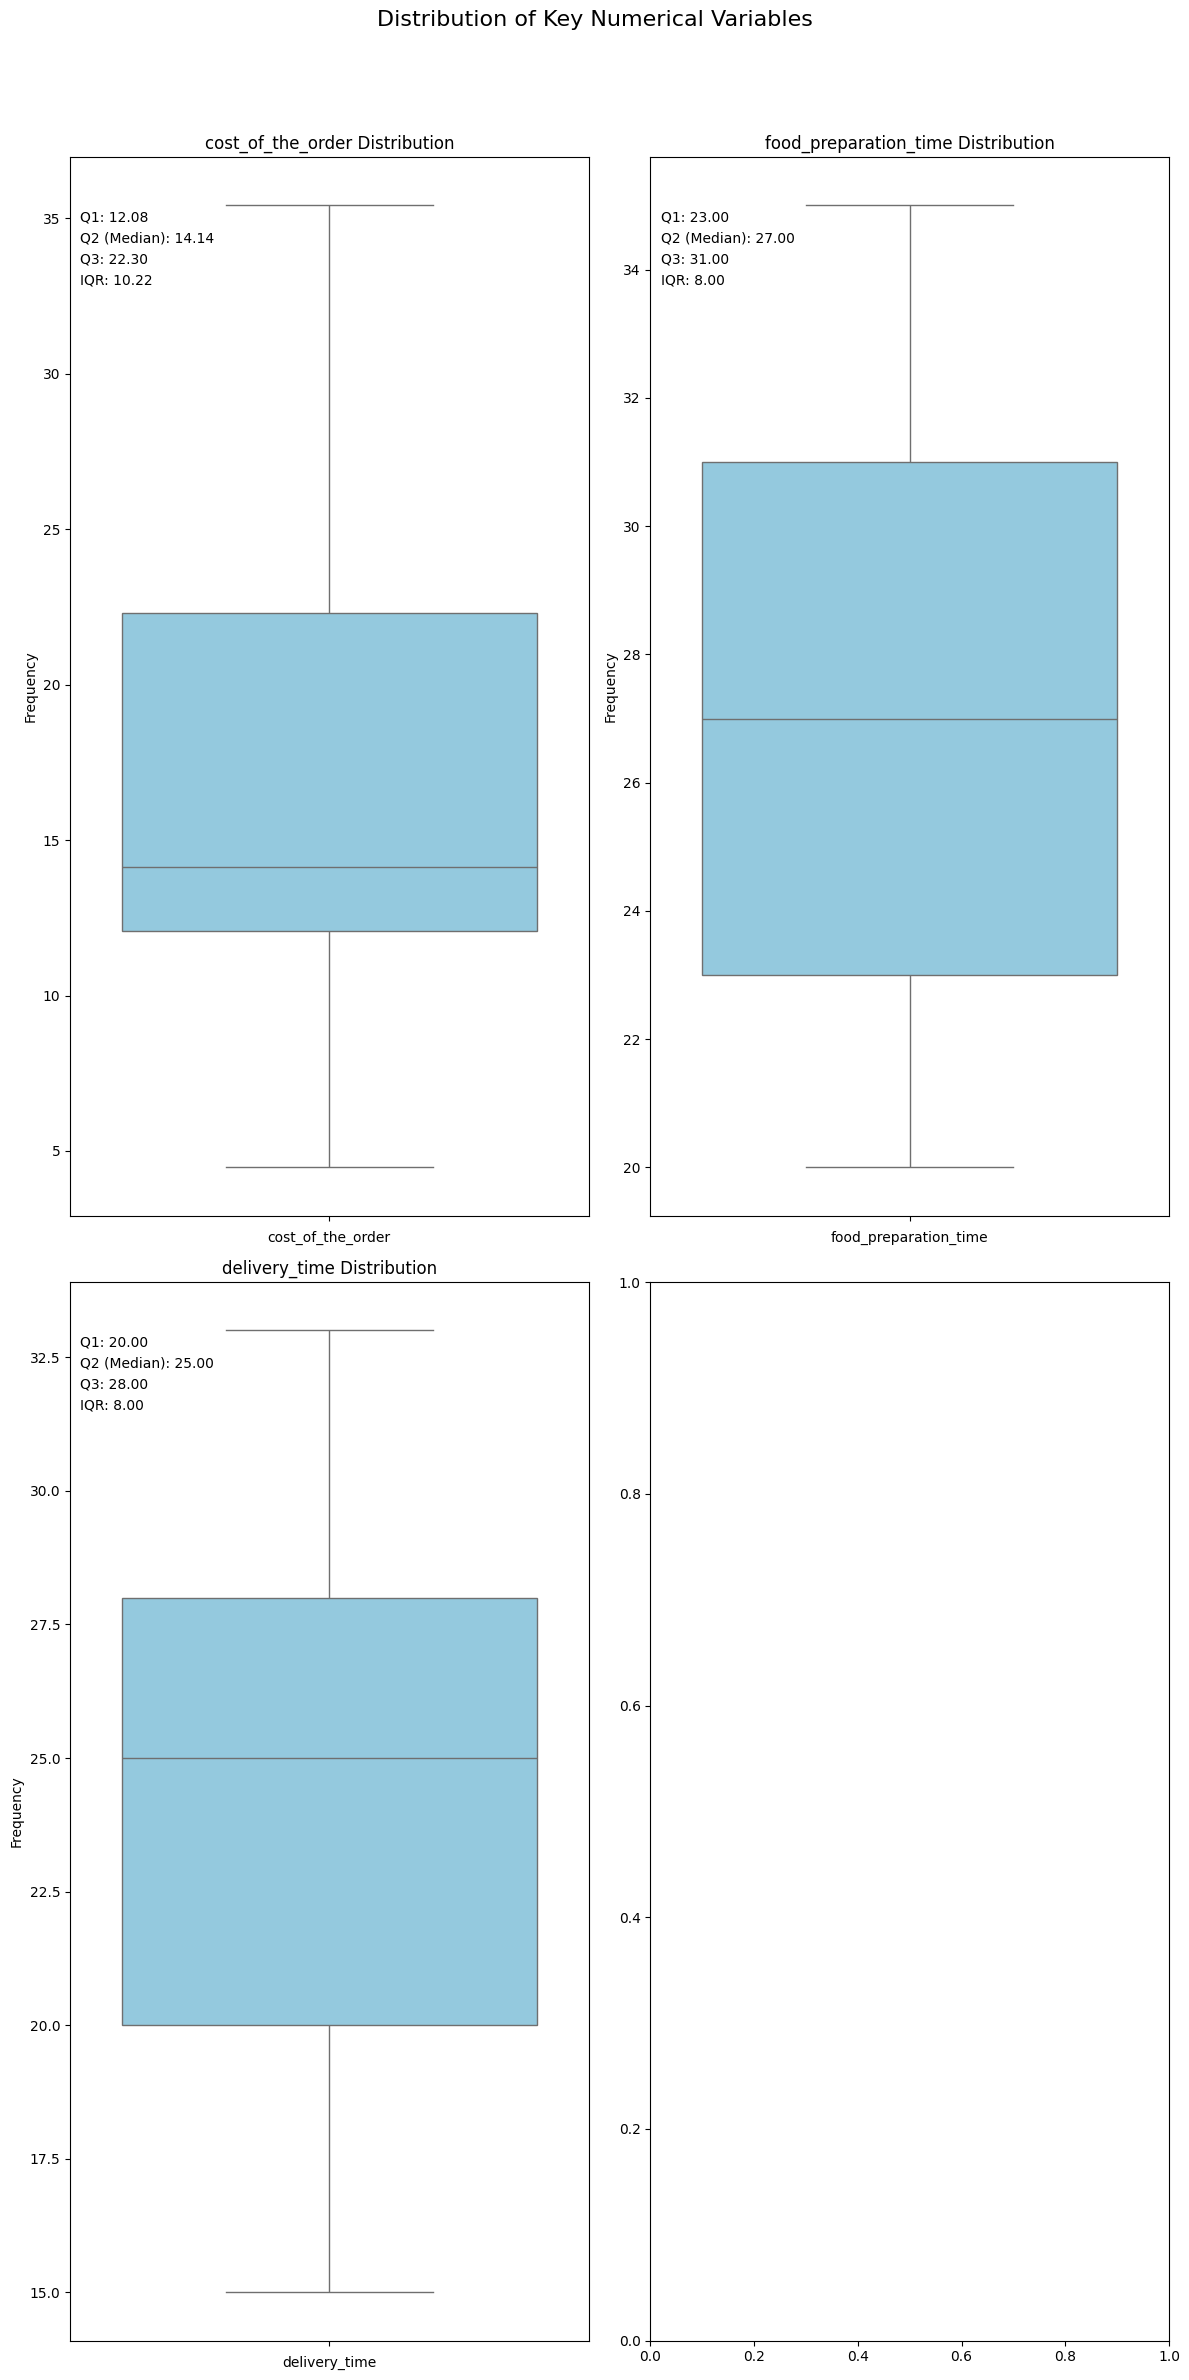

In [ ]:

# We analize the numerical attributes with boxplot graphs.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 25))

fig.suptitle('Distribution of Key Numerical Variables', fontsize=16)


row = 0
col = 0

df_modif = df.drop(columns=['order_id','customer_id'])

# Loop for iterating through DataFrame columns
for column_name in df_modif.columns:

    if row < axes.shape[0] and col < axes.shape[1]:

        if df_modif[column_name].dtype in ['int64', 'float64']:
            Q1 = df_modif[column_name].quantile(0.25)
            Q2 = df_modif[column_name].median()
            Q3 = df_modif[column_name].quantile(0.75)
            IQR = Q3 - Q1

            sns.boxplot(df_modif[column_name], ax=axes[row, col], color='skyblue')
            axes[row, col].set_title(f'{column_name} Distribution')

            axes[row, col].text(0.02, 0.95, f'Q1: {Q1:.2f}', transform=axes[row, col].transAxes, fontsize=10, verticalalignment='top')
            axes[row, col].text(0.02, 0.93, f'Q2 (Median): {Q2:.2f}', transform=axes[row, col].transAxes, fontsize=10, verticalalignment='top')
            axes[row, col].text(0.02, 0.91, f'Q3: {Q3:.2f}', transform=axes[row, col].transAxes, fontsize=10, verticalalignment='top')
            axes[row, col].text(0.02, 0.89, f'IQR: {IQR:.2f}', transform=axes[row, col].transAxes, fontsize=10, verticalalignment='top')

            axes[row, col].set_xlabel(column_name)
            axes[row, col].set_ylabel('Frequency')

            col += 1
            if col >= axes.shape[1]:
                col = 0
                row +=1

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### obesrvations:

1. Cost of the Order: This is the most skewed distribution in the group. Median (Q2): Approximately 14.14. Half of the orders cost less than this amount. Interquartile Range (IQR): Between 12.08 (Q1) and 22.30 (Q3). This means that 50% of orders fall within this fairly narrow range. Skewness: There is a very long upper "whisker" extending up to 35. This indicates that, while most meals are affordable, there is a significant proportion of much more expensive orders that pull the average upward.

2. Food Preparation Time: This distribution is very balanced and uniform. Median (Q2): 27 minutes. Range: Preparation time varies from approximately 20 to 35 minutes. Observation: The box is centered, and the whiskers are of almost equal length. This suggests a predictable and stable cooking process, without extreme delays or impromptu preparations. The majority of dishes are ready in 23 to 31 minutes (IQR).

3. Delivery Time: Delivery time shows a slight positive skew (upward). Median (Q2): 25 minutes. Dispersion: 50% of deliveries take between 20 (Q1) and 28 minutes (Q3). Observation: The minimum time is approximately 15 minutes, while the maximum reaches approximately 33 minutes. The fact that the median is closer to the bottom of the box indicates that quick deliveries are frequent, but longer journeys occur regularly.

In [ ]:

# Calculate the frequency of 'cost_of_the_order' by grouping them into 10 bins
# pd.cut is used to segment and sort data values into bins.
# value_counts() then counts the number of occurrences in each bin.
order_cost_bins = pd.cut(df['cost_of_the_order'], bins=10)
value_counts = order_cost_bins.value_counts().sort_index()
display(value_counts)


,count
cost_of_the_order,
"(4.439, 7.564]",181
"(7.564, 10.658]",219
"(10.658, 13.752]",450
"(13.752, 16.846]",365
"(16.846, 19.94]",126
"(19.94, 23.034]",135
"(23.034, 26.128]",170
"(26.128, 29.222]",108
"(29.222, 32.316]",87


#### Observations:

The most frequent order value falls within the (10.658, 13.752] range, with 450 orders.

Combined with the neighboring bin (13.752–16.846), over 43% of your customers are spending between roughly 10.66 and 16.85.

The drop-off after 16.85 is quite noticeable (from 365 orders down to 126). This might indicate a "psychological barrier" where customers hesitate to spend more than 17–20, or perhaps higher-priced items aren't as clearly marketed.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

Dominance of Shake Shack: Shake Shack is the most popular restaurant in this dataset, accounting for over one-third (34.5%) of the orders among the top five. Its volume is significantly higher than the runner-up, nearly 66% more than The Meatball Shop.

Brand Synergy (Blue Ribbon): If we look at the "Blue Ribbon" brand collectively, its two locations (Blue Ribbon Sushi and Blue Ribbon Fried Chicken) combine for 215 orders. This nearly matches Shake Shack's performance, suggesting that the Blue Ribbon parent brand has a very strong overall footprint in this market.

The "Top Two" Concentration: Shake Shack and The Meatball Shop together represent over 55% of the orders for these top 5 locations.

Consistency in Popularity: Even the 5th most popular restaurant, Parm, maintains a double-digit share (10.7%), indicating that these five restaurants are likely established local favorites with steady demand.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head()



,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:

The most populat cuisine on weekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]

0.2924130663856691

#### Observations:

29% of of orders have a cost highre than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:

The mean delivery time is 24.1 min


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

The top three customers that odered respectively 13, 10 and 9 are,
customer_id
52832;
47440;
83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


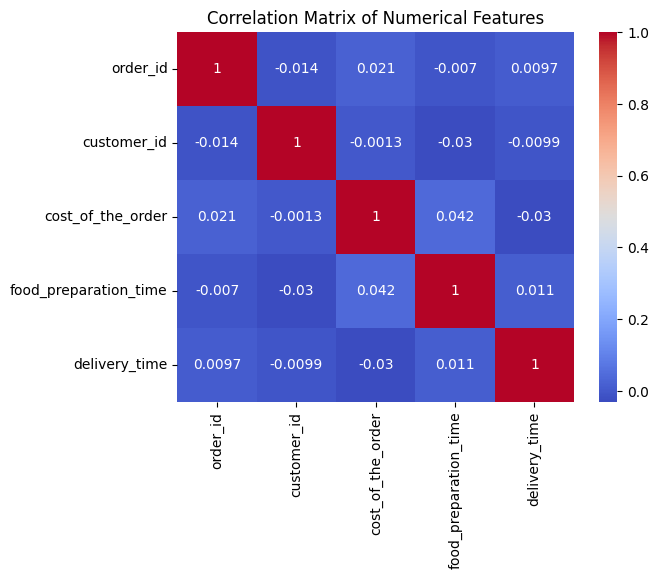

In [ ]:

sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observation:
There is no correlation between valiables

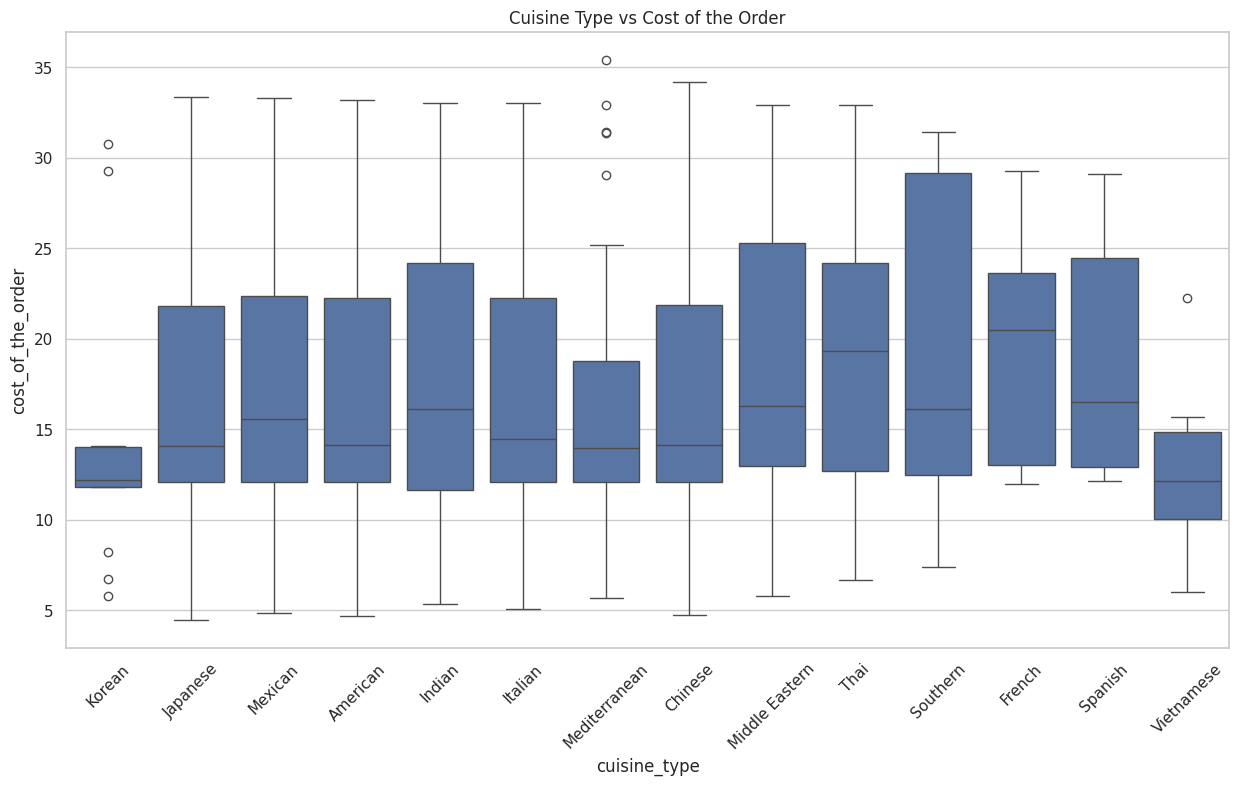

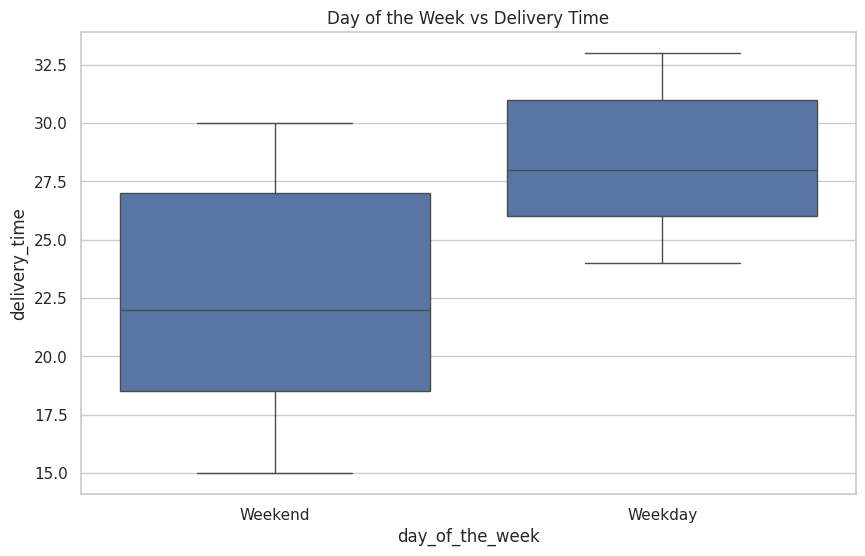

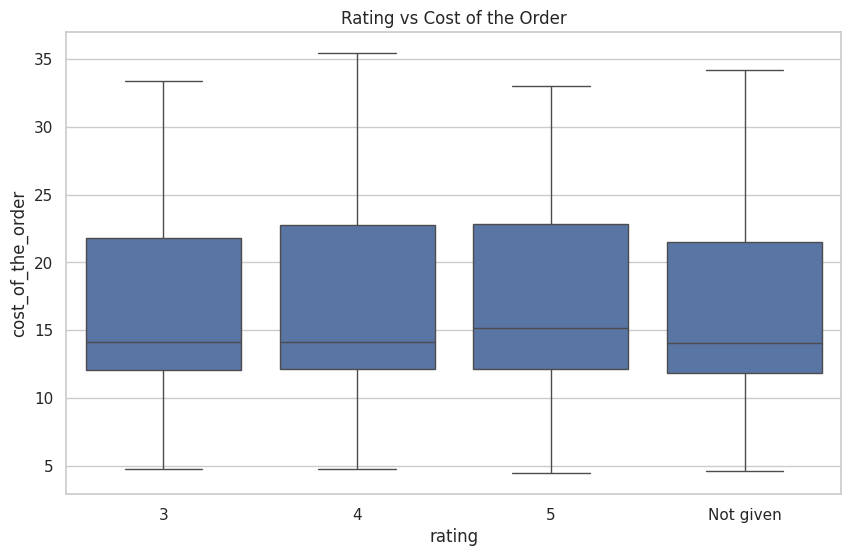

In [ ]:
# Convert 'rating' to numeric, handling 'Not given' as NaN
df['rating_num'] = pd.to_numeric(df['rating'].replace('Not given', np.nan))


plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)
plt.title('Cuisine Type vs Cost of the Order')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Day of the Week vs Delivery Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='cost_of_the_order', order=['3', '4', '5', 'Not given'])
plt.title('Rating vs Cost of the Order')
plt.show()



### Observations:

Kitchen pricing : French cuisine tend to have the highest average order costs, while Vietnamese and Korean are generally the most affordable.

Delivery Efficiency: There is a significant difference in delivery times based on the day of the week. Weekdays have a higher average delivery time ( 28.3 dollar / minutes) compared to Weekends ( 22.5 dollar / minutes), likely due to traffic patterns or courier availability.

Ratings vs. Cost: There is no clear relationship between the cost of the order and the rating received. High-rated orders (5) and lower-rated orders (3) show similar price distributions.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = pd.to_numeric(df['rating'])

restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(rating_count='count', average_rating='mean').reset_index()

promotional_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)]

print("Restaurants eligible for promotional offer:")
display(promotional_restaurants)

Restaurants eligible for promotional offer:


,restaurant_name,rating_count,average_rating
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


#### Observations:

The four restaurants that have rating count upper than 50 and average rating greater than 4 are;
Blue Ribbon Fried Chicken
Blue Ribon sushi
Shake Shack
The Meatball Shop




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculate revenue for each order based on conditions
conditions = [
    df['cost_of_the_order'] > 20,
    (df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)
]
choices = [
    df['cost_of_the_order'] * 0.25, # 25% charge
    df['cost_of_the_order'] * 0.15  # 15% charge
]

# Use np.select to apply conditions; default for others (cost <= 5) will be 0 revenue
df['revenue_per_order'] = np.select(conditions, choices, default=0)
df['revenue_per_order'].head(5)


,revenue_per_order
0,7.6875
1,1.8120
2,1.8345
3,7.3000
4,1.7385


In [ ]:
net_revenue = df['revenue_per_order'].sum()
net_revenue_by_order = df.groupby('order_id')['revenue_per_order'].sum()

print(f"The net revenue generated by the company across all orders is: ${net_revenue:.2f}")


The net revenue generated by the company across all orders is: $6166.30


#### Observations:

Total net revenue is 6166.30 dollars.
mean of Net revenue by order is


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
order_more_60_minuts = df[df['total_delivery_time'] > 60]
poucentage = (order_more_60_minuts.shape[0] / df.shape[0]) * 100
print("The percentage of orders that take more than 60 minutes to get delivered is: ")
print(poucentage)

The percentage of orders that take more than 60 minutes to get delivered is: 
10.537407797681771


#### Observations:


10.5% of the total order have total delivery time more than 60 min


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:

One of the raisons why, the delivery time in week day is greater than the one of the weekends , is for trafic jam .


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# Conclusions:

- Customer Preferences: American cuisine is the most popular, especially on weekends, followed closely by Japanese and Italian. Shake Shack is the dominant restaurant in terms of order volume, followed by The Meatball Shop and Blue Ribbon Sushi.

- Operational Efficiency: The service is fairly predictable, with an average food preparation time of 27 minutes and a delivery time of 24 minutes.

- Operational Bottlenecks: Food preparation generally takes longer than delivery, identifying the kitchen as the primary bottleneck for reducing total wait times.

- Temporal Trends: There is a significant surge in demand during the weekend (approximately 1,300 orders) compared to weekdays (500–600 orders). Delivery is also notably faster on weekends (22.5 minutes) than on weekdays (28.3 minutes), likely due to traffic or courier availability.

- Pricing and Revenue: Most customers (over 43%) spend between $10.66 and $16.85. There is a noticeable "psychological barrier" at the $17 mark, where order volume drops significantly.

- Feedback Trends: A high volume of orders (736) are not rated. When ratings are provided, they are overwhelmingly positive.

# Recommendations:

##Optimize Delivery and Operations:

- Address Weekday Delays: Investigate the causes of longer weekday delivery times (e.g., traffic or low courier density) and consider incentive programs for couriers during these periods to improve speed.

- Improve Kitchen Efficiency: Since preparation is an operational bottleneck, the company should partner with restaurants to streamline kitchen workflows, which would yield a more significant reduction in total wait time than delivery optimization alone.


##Strategic Marketing and Cuisine Expansion:

- Targeted Promotions: Market higher-priced items (over $20) more effectively to overcome the current "psychological barrier" where customers hesitate to spend more.

- Leverage Weekend Demand: Given the massive surge in weekend orders (approx. 1,300 vs. 500–600 on weekdays), run weekend-specific promotions for the most popular cuisines (American and Japanese) to maximize revenue.


##Enhance Feedback and Engagement:

- Incentivize Ratings: Implement a system to encourage the large percentage of non-rating customers to provide feedback, perhaps through small loyalty points or discounts on future orders.

- Reward Top Customers: Maintain loyalty by continuing or expanding discount programs for frequent customers (e.g., the 20% vouchers for top users).

---